In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [31]:
data=pd.read_csv('Nat_Gas.csv')

In [32]:
data['date']=pd.to_datetime(data['Dates'],format='%m/%d/%y')
data.set_index('date',inplace=True)

In [33]:
data.head()

,Dates,Prices
date,,
2020-10-31,10/31/20,10.1
2020-11-30,11/30/20,10.3
2020-12-31,12/31/20,11.0
2021-01-31,1/31/21,10.9
2021-02-28,2/28/21,10.9


In [34]:
data.drop('Dates',axis=1,inplace=True)

In [4]:
# Step 1: Check for stationarity (ADF Test can be used, but for simplicity, let's assume the data needs differencing)

In [35]:
# Step 2: Fit ARIMA model (assume p=1, d=1, q=1, fine tune these values based on ACF/PACF analysis)
model=ARIMA(data['Prices'],order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [36]:
print(model_fit.summary())

                                    SARIMAX Results                                     
Dep. Variable:                           Prices   No. Observations:                   48
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  -0.641
Date:                          Fri, 13 Sep 2024   AIC                             11.281
Time:                                  17:25:13   BIC                             19.058
Sample:                              10-31-2020   HQIC                            13.966
                                   - 09-30-2024                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2254      0.275     -0.821      0.412      -0.763       0.313
ma.L1         -0.7655      0.206     -3.711      0.

In [37]:
# Step 4: Forecast future values (next 12 months)
forecast = model_fit.forecast(steps=12)

In [38]:
# Creating future dates to plot alongside forecasted values
from dateutil.relativedelta import relativedelta
future_dates = [data.index[-1] + relativedelta(months=i) for i in range(1, 13)]

In [41]:
forecast.index = future_dates

In [43]:
forecast.index

DatetimeIndex(['2024-10-30', '2024-11-30', '2024-12-30', '2025-01-30',
               '2025-02-28', '2025-03-30', '2025-04-30', '2025-05-30',
               '2025-06-30', '2025-07-30', '2025-08-30', '2025-09-30'],
              dtype='datetime64[ns]', freq=None)

In [44]:
forecast.values

array([11.98737957, 12.61010173, 12.92520654, 13.06474287, 13.01229826,
       13.0440463 , 12.43967188, 12.12138138, 11.98729995, 12.2120605 ,
       12.13201999, 12.37840669])

In [46]:
forecasted_data=pd.DataFrame(forecast)

In [51]:
forecasted_data.head()

,predicted_mean
2024-10-30,11.987380
2024-11-30,12.610102
2024-12-30,12.925207
2025-01-30,13.064743
2025-02-28,13.012298


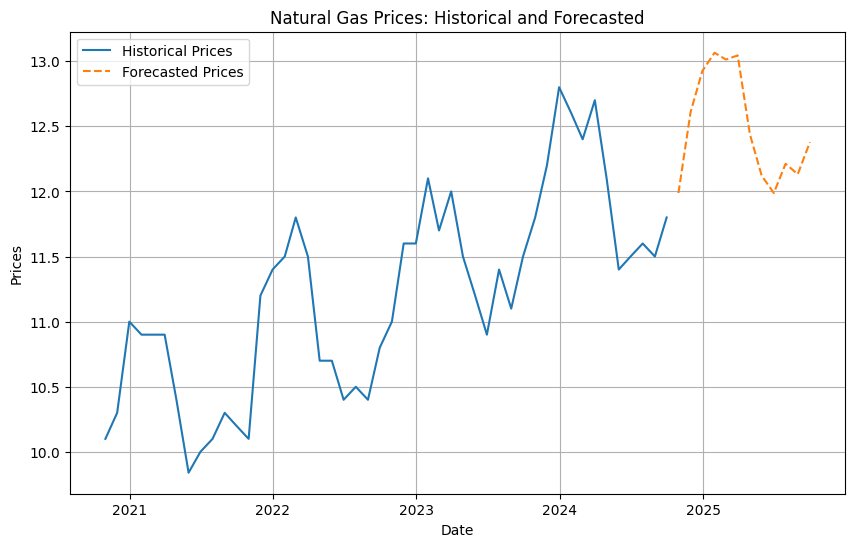

In [50]:
# Step 5: Plotting historical prices and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Prices'], label='Historical Prices')
plt.plot(future_dates, forecast, label='Forecasted Prices', linestyle='--')
plt.title('Natural Gas Prices: Historical and Forecasted')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.grid(True)
plt.show()

In [59]:

def estimate_price(input_date):
    input_date = pd.to_datetime(input_date)

    if input_date < data.index.min():
        return "Date is out of range (before the data range)."

    if input_date <= data.index.max():
        # For historical dates, find the nearest price
        nearest_date = data.index.get_indexer([input_date], method='nearest')[0]
        return f"Estimated price on {input_date.date()} is ${data.iloc[nearest_date]['Prices']:.2f}"

    # For future dates, use the extrapolated model
    months_future_input = (input_date.year - data.index.max().year) * 12 + (input_date.month - data.index.max().month)
    if months_future_input <= 12:
        return f"Estimated price is ${forecasted_data.iloc[months_future_input - 1]['predicted_mean']:.2f}"
    else:
        return "Date is too far in the future (beyond 12-month extrapolation)."


In [61]:
estimate_price('2023-06-15')
estimate_price('2025-09-15')


'Estimated price is $12.38'